# Laboratorio 2: CompuAlpes

- Juan Camilo Colmenares - 202011866
- Juan Montealegre - 20201723
- David Gonzales - 201815834

CompuAlpes es una reconocida tienda minorista que vende computadores portátiles de diferentes fabricantes y especificaciones técnicas. Con el auge de la tecnología y el creciente número de productos en el mercado, la empresa busca optimizar sus estrategias de fijación de precios y promociones para seguir siendo competitiva. Es en este último punto, donde ha identificado un reto relacionado con **determinar el precio adecuado para un portatil** ya que el mercado es dinámico y la valoración de las características técnicas cambia con el tiempo. Poner un precio demasiado alto puede alejar a los clientes, mientras que ponerlo demasiado bajo puede reducir los márgenes de ganancia.

Esto motivó a CompuAlpes a proponer el objetivo de este proyecto, en el cual se desea **construir un modelo de regresión que permita estimar el precio de un portátil a partir de sus especificaciones técnicas, determinando las que más impactan en el precio o que son, de acuerdo a la evidencia, irrelevantes para la estimación**. Este modelo permitirá a CompuAlpes tener una base objetiva y cuantitativa al momento de establecer precios para sus productos.

In [1]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import scipy.stats as stats

### Carga de los datos

In [26]:
df = pd.read_csv('./data/202320_Laboratorio 2 - Regresión_data_laptop_data_train.csv')

## 1. Entendimiento de los datos

In [3]:
df.shape

(1216, 14)

In [4]:
df.sample(5)

,id,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
841,665,Toshiba,Notebook,4,2.10,10.186161,0,0,100.454670,Intel Core i3,0.0,128,Intel,Windows
80,244,Lenovo,2 in 1 Convertible,8,1.38,10.959351,1,1,158.482530,Intel Core i7,0.0,256,Intel,Windows
1210,119,Asus,Notebook,8,1.70,10.994858,0,0,141.211998,Intel Core i7,0.0,256,Nvidia,Windows
797,1113,HP,Ultrabook,8,1.16,11.560842,0,0,165.632118,Intel Core i7,0.0,512,Intel,Windows
709,684,Lenovo,2 in 1 Convertible,8,1.19,11.288115,1,1,165.632118,Intel Core i7,NaN,512,Intel,Windows


Para entrenar un modelo de regresión todas las variables de entrada (features) deben ser numéricas. Con ayuda de los expertos, se seleccionan las variables numéricas que se consideran más importantes para la estimación de la variable objetivo (target) `Price`.

Hay variables booleanas que deberían influir en el precio de una laptop como Ips pero para este modelo no parece aplicar.
[Aquí se habla de eso](https://towardsdatascience.com/machine-learning-102-logistic-regression-9e6dc2807772)

In [27]:
features = ['Ram', 'Weight', 'Ppi', 'HDD', 'SSD']

In [28]:
df[['Price'] + features].isnull().sum() / df.shape[0]

Price     0.012336
Ram       0.000000
Weight    0.018914
Ppi       0.009868
HDD       0.013158
SSD       0.000000
dtype: float64

In [43]:
duplicated_rows = df.loc[df.duplicated(subset = features, keep = False)].shape[0]
duplicated_rows

631

In [44]:
print('Duplicates %:', (duplicated_rows / df.shape[0]))

Duplicates %: 0.5189144736842105


In [45]:
duplicated_rows = df.loc[df.duplicated(subset = features + ['Price'], keep = False)].shape[0]
duplicated_rows

22

In [46]:
print('Duplicates %:', (duplicated_rows / df.shape[0]))

Duplicates %: 0.018092105263157895


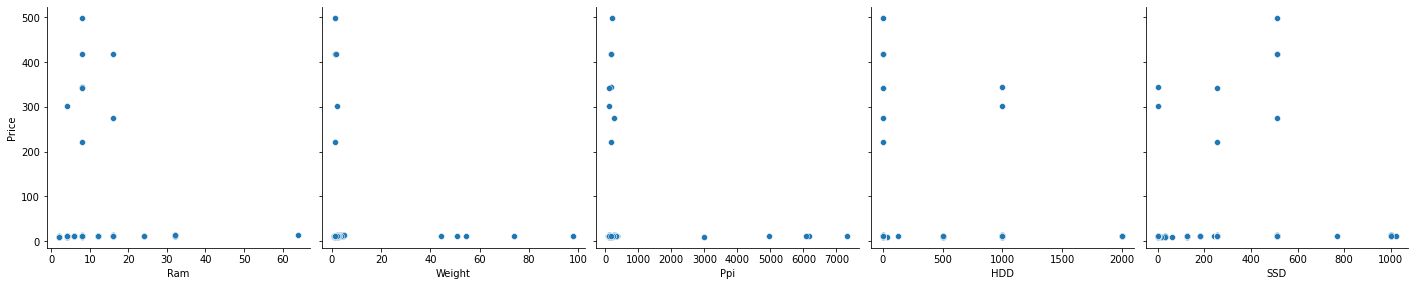

In [35]:
sns.pairplot(df, height = 4, y_vars = 'Price', x_vars = features, kind = 'scatter')

<AxesSubplot:>

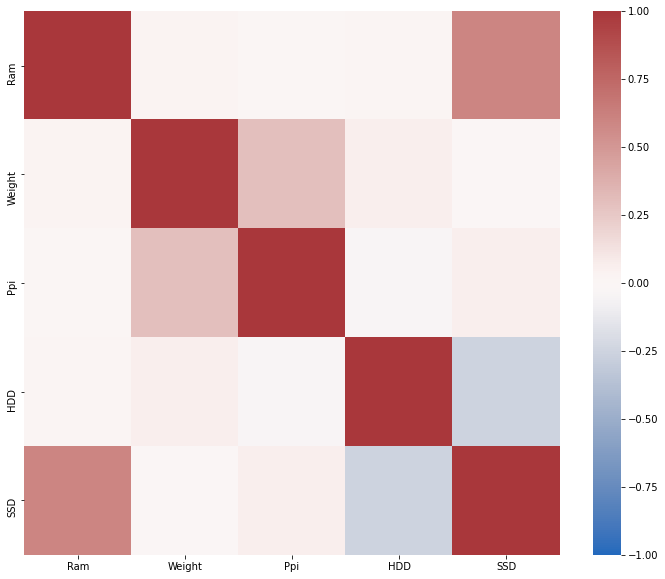

In [41]:
plt.figure(figsize = (12, 10))
sns.heatmap(df[features].corr(), cmap = 'vlag', vmin = -1, vmax = 1)

## 2. Preparación de datos

In [12]:
df = df.dropna(subset = ['Price'] + features)

In [14]:
df.shape

(1170, 14)

In [17]:
df[['Price'] + features].isnull().sum() / df.shape[0]

Price     0.0
Ram       0.0
Weight    0.0
Ppi       0.0
HDD       0.0
SSD       0.0
dtype: float64

## 3. Modelado

## 4. Evaluación cuantitativa

## 5. Evaluación cualitativa